In [1]:
from sklearn.datasets import fetch_openml
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
import time

x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
x.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
x = np.array(x/255)
y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_test = x_train.T, x_test.T
y_train, y_test = y_train.T, y_test.T

np.random.seed(123)

In [4]:
y.shape,x.shape

((70000, 10), (70000, 784))

In [5]:
X = x_train
Y = y_train
classes = 10
input_num = x_train.shape[0]
m = y_train.shape[1]
hidden_num = 64
learning_rate = 0.1
epochs = 500

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(y, y_hat):
    return -(1/m) * np.sum(np.multiply(y, np.log(y_hat)))

print('Starting training....')
W1 = np.random.randn(hidden_num, input_num)
b1 = np.zeros((hidden_num, 1))
W2 = np.random.randn(classes, hidden_num)
b2 = np.zeros((classes, 1))

plot_costs = []
plot_iterations = []

for i in range(epochs):

    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_cost(Y, A2)

    dZ2 = A2 - Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    plot_costs.append(cost)
    plot_iterations.append(i)

    if (i % 50 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Starting training....
Epoch 0 cost:  6.638236240193954
Epoch 50 cost:  3.17585243536839
Epoch 100 cost:  2.350034990793725
Epoch 150 cost:  1.9053188377590333
Epoch 200 cost:  1.6309045349067477
Epoch 250 cost:  1.4447934340626338
Epoch 300 cost:  1.3099457870555498
Epoch 350 cost:  1.2073562886842524
Epoch 400 cost:  1.1263405532042676
Epoch 450 cost:  1.0604965542035762
Final cost: 1.006762712137436


In [11]:
import matplotlib.pyplot as plt

def plot(X, y):
  plt.plot(X, y)
  plt.title('Cost Function Plot')
  plt.xlabel('Iteration')
  plt.ylabel('Cost')

  return

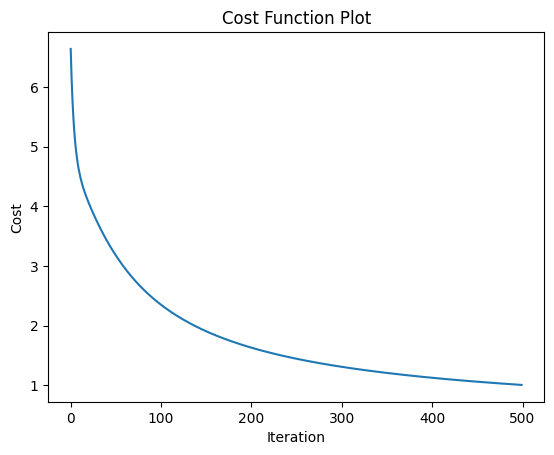

In [12]:
plot(plot_iterations, plot_costs)

Test if the predicted is the same as the label. The mean of the results will be the accuracy as 0 or 1.

In [13]:
def accuracy(XTest, ytest, W1, b1, W2, b2):
  Z1 = np.matmul(W1, XTest) + b1
  A1 = sigmoid(Z1)
  Z2 = np.matmul(W2,A1) + b2
  A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
  predicted = np.argmax(A2, axis=0)
  labels = np.argmax(ytest, axis=0)
  return np.mean(predicted == labels)

In [14]:
accuracy(x_test, y_test, W1, b1, W2, b2)

0.6846428571428571